An introduction briefly (one paragraph) explaining the dataset, why you chose it, and what is
contained within.

# Steam Games Dataset
The dataset I chose for this project is a very large (~100,000) list of steam games and dlcs, with many columns of information linked, explained below. This 

## Columns
`appid` - id of the game<br>
`type` - whether it is a game or a dlc<br>
`name` - name of the game<br>
`required_age` - age required to play the game<br>
`dlc` - list of dlc's for the game<br>
`fullgame` - game the dlc is part of<br>
`supported_languages` - list of supported languages<br>
`developers` - list of developers<br>
`publishers` - list of publishers<br>
`packages` - list of packages the game is included into<br>
`platforms` - list of supported platforms<br>
`categories` - list of the game catagories<br>
`genres` - list of the game genres<br>
`achievements` - number of achievements the game has<br>
`release_date` - the release date of the game<br>
`supported_audio` - list of supported audio languages<br>
`coming_soon` - if the game is released or not<br>
`price` - price of the game<br>
`review_score` - steam review score (1-10)<br>
`total_positive` - total positive reviews<br>
`total_negative` - total negative reviews<br>
`rating` - total rating of all reviews<br>
`owners` - estimated number of owners<br>
`average_forever` - average playtime<br>
`median_forever` - median playtime<br>
`tags` - list of player tags<br>

In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import numpy as np
import pandas as pd
import math
import seaborn as sns
import gc
pd.set_option ('display.max_columns', None)

C:\Users\tdepa\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df2 = pd.read_csv("./data/steam_data/steam_requirements_data.csv")
df = pd.read_csv("./data/steam_data/steam.csv")
df.head(5)

,appid,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
0,10,game,Counter-Strike,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],"[574941, 7]","['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,2000-11-01,"['English', 'French', 'German', 'Italian', 'Ko...",False,8.19,9.0,117261.0,3686.0,95.566768,10000000-20000000,10499,202,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C..."
1,20,game,Team Fortress Classic,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],[29],"['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,1999-04-01,NaN,False,3.99,8.0,3896.0,705.0,81.939532,2000000-5000000,1637,23,"['Action', 'FPS', 'Multiplayer', 'Classic', 'H..."
2,30,game,Day of Defeat,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Sp...",['Valve'],['Valve'],[30],"['windows', 'mac', 'linux']","['Multi-player', 'Valve Anti-Cheat enabled']",['Action'],0.0,2003-05-01,NaN,False,3.99,8.0,2794.0,398.0,84.223637,5000000-10000000,169,11,"['FPS', 'World War II', 'Multiplayer', 'Shoote..."
3,40,game,Deathmatch Classic,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],[31],"['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,2001-06-01,NaN,False,3.99,6.0,1214.0,308.0,76.485571,5000000-10000000,2632,6,"['Action', 'FPS', 'Classic', 'Multiplayer', 'S..."
4,50,game,Half-Life: Opposing Force,0,NaN,NaN,"['English', 'French', 'German', 'Korean']",['Gearbox Software'],['Valve'],[32],"['windows', 'mac', 'linux']","['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],0.0,1999-11-01,NaN,False,3.99,9.0,11343.0,519.0,92.916082,5000000-10000000,442,250,"['FPS', 'Action', 'Classic', 'Sci-fi', 'Single..."


In [3]:
dfBruh = df.head(100)
dfBruh['rating_count'] = dfBruh[['total_positive','total_negative']].sum(axis=1, numeric_only=True)
# print(dataframe_sum)
# dfBruh['rating_count'] = dfBruh.apply(lambda x: bruh(dfBruh.total_positive,dfBruh.total_negative), axis=1)
# df['rating_count'] = df.apply(lambda x: df.total_positive+df.total_negative, axis=1)
dfBruh

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,appid,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags,rating_count
0,10,game,Counter-Strike,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],"[574941, 7]","['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,2000-11-01,"['English', 'French', 'German', 'Italian', 'Ko...",False,8.19,9.0,117261.0,3686.0,95.566768,10000000-20000000,10499,202,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C...",120947.0
1,20,game,Team Fortress Classic,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],[29],"['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,1999-04-01,NaN,False,3.99,8.0,3896.0,705.0,81.939532,2000000-5000000,1637,23,"['Action', 'FPS', 'Multiplayer', 'Classic', 'H...",4601.0
2,30,game,Day of Defeat,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Sp...",['Valve'],['Valve'],[30],"['windows', 'mac', 'linux']","['Multi-player', 'Valve Anti-Cheat enabled']",['Action'],0.0,2003-05-01,NaN,False,3.99,8.0,2794.0,398.0,84.223637,5000000-10000000,169,11,"['FPS', 'World War II', 'Multiplayer', 'Shoote...",3192.0
3,40,game,Deathmatch Classic,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],[31],"['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,2001-06-01,NaN,False,3.99,6.0,1214.0,308.0,76.485571,5000000-10000000,2632,6,"['Action', 'FPS', 'Classic', 'Multiplayer', 'S...",1522.0
4,50,game,Half-Life: Opposing Force,0,NaN,NaN,"['English', 'French', 'German', 'Korean']",['Gearbox Software'],['Valve'],[32],"['windows', 'mac', 'linux']","['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],0.0,1999-11-01,NaN,False,3.99,9.0,11343.0,519.0,92.916082,5000000-10000000,442,250,"['FPS', 'Action', 'Classic', 'Sci-fi', 'Single...",11862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3260,game,Safecracker: The Ultimate Puzzle Adventure,0,NaN,NaN,"['English', 'German', 'Italian', 'Spanish - Sp...",['Kheops Studio'],['HandyGames'],[2503],['windows'],['Single-player'],"['Adventure', 'Casual']",0.0,2007-08-29,NaN,False,4.99,5.0,218.0,161.0,56.261984,100000-200000,26,31,"['Puzzle', 'Adventure', 'Casual', 'Point & Cli...",379.0
96,3270,game,Painkiller Overdose,0,NaN,NaN,"['English', 'German']",['Mindware Studios'],['Prime Matter'],"[2236, 35563]",['windows'],"['Single-player', 'Multi-player']",['Action'],0.0,2007-10-30,NaN,False,4.99,6.0,477.0,185.0,68.934524,100000-200000,51,51,"['Action', 'FPS', 'Shooter', 'Horror', 'Multip...",662.0
97,3300,game,Bejeweled 2 Deluxe,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Sp...","['PopCap Games, Inc.']","['PopCap Games, Inc.', 'Electronic Arts']",[121],"['windows', 'mac']","['Single-player', 'Remote Play on Phone', 'Rem...",['Casual'],0.0,2006-08-30,NaN,False,4.99,8.0,336.0,20.0,86.817572,50000-100000,129,239,"['Casual', 'Puzzle', 'Match 3', 'Singleplayer'...",356.0
98,3310,game,Chuzzle Deluxe,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Sp...","['PopCap Games, Inc.']","['PopCap Games, Inc.', 'Electronic Arts']",[126],"['windows', 'mac']",['Single-player'],['Casual'],0.0,2006-08-30,NaN,False,4.99,8.0,550.0,44.0,86.367852,50000-100000,41,58,"['Casual', 'Puzzle', 'Match 3', 'Singleplayer'...",594.0


In [4]:
# There were only two rows with a different type (music, advertising), so I got rid of them.
df = df[(df['type'] == 'game') | (df['type'] == 'dlc')]
df['type'].value_counts()

game    67870
dlc     34632
Name: type, dtype: int64

In [5]:
# averages out the 'owners' column ... 100-500 is now 300
df['owners'] = df['owners'].apply(lambda row: ((int(row.split('-')[0]))+(int(row.split('-')[1])))/2)
df.head(1)

,appid,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
0,10,game,Counter-Strike,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],"[574941, 7]","['windows', 'mac', 'linux']","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],0.0,2000-11-01,"['English', 'French', 'German', 'Italian', 'Ko...",False,8.19,9.0,117261.0,3686.0,95.566768,15000000.0,10499,202,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C..."


In [1]:
# creates new column showing how many languages the game supports
# df['languages'] = df['supported_languages'].apply(lambda row: print(list(row)))
# df.head(1)

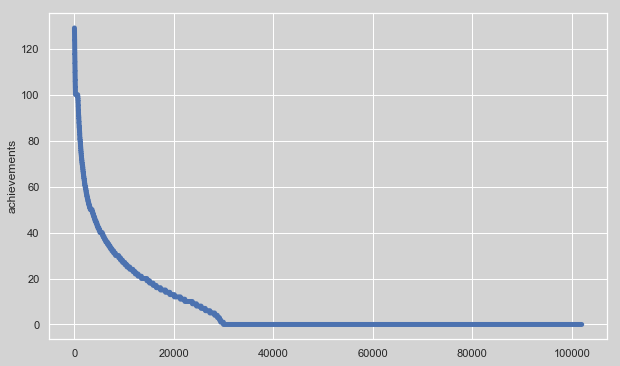

In [6]:
# df = df.sort_values(by='required_age', ascending=False).tail(len(df)-2)
df = df.sort_values(by='achievements', ascending=False)
dfAchievements = df[df['achievements'] <= df['achievements'].quantile(q=0.995)]
dfAchievements.head(10)

try:
    dfAchievements.reset_index(inplace = True)
except:
    pass
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgray'}) # sets background colors
fig, ax = plt.subplots(figsize=(10, 6))
achievementsGraph = sns.lineplot(data=dfAchievements, x=dfAchievements.index, y='achievements', ci=0.9, ax=ax, linewidth=5)
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.title('bruh', fontsize=20)
# plt.xlabel('bruh', fontsize=20)
# plt.ylabel('bruh', fontsize=20)
gc.collect()
plt.show()

In [7]:
df.corr()

,appid,required_age,achievements,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever
appid,1.000000,-0.000622,-0.042308,0.335740,-0.073600,-0.315597,-0.042983,-0.025304,-0.214296,-0.075595,-0.082588,-0.055547
required_age,-0.000622,1.000000,-0.000315,0.007803,0.047028,-0.001561,0.000238,0.000165,-0.001737,0.000201,-0.000040,-0.000119
achievements,-0.042308,-0.000315,1.000000,-0.032202,0.007718,0.083771,0.015140,0.008481,0.060040,0.021094,0.022051,0.013530
coming_soon,0.335740,0.007803,-0.032202,1.000000,-0.028210,-0.255409,-0.014243,-0.009441,-0.241910,-0.023932,-0.033626,-0.024894
price,-0.073600,0.047028,0.007718,-0.028210,1.000000,0.184669,0.050918,0.033531,0.145741,0.042607,0.084536,0.063704
review_score,-0.315597,-0.001561,0.083771,-0.255409,0.184669,1.000000,0.066700,0.035337,0.723601,0.091959,0.121850,0.085817
total_positive,-0.042983,0.000238,0.015140,-0.014243,0.050918,0.066700,1.000000,0.706953,0.081786,0.555109,0.254327,0.063126
total_negative,-0.025304,0.000165,0.008481,-0.009441,0.033531,0.035337,0.706953,1.000000,0.031210,0.488587,0.214025,0.057440
rating,-0.214296,-0.001737,0.060040,-0.241910,0.145741,0.723601,0.081786,0.031210,1.000000,0.099775,0.117729,0.078587
owners,-0.075595,0.000201,0.021094,-0.023932,0.042607,0.091959,0.555109,0.488587,0.099775,1.000000,0.310641,0.057164


In [8]:
df = df.sort_values(by='required_age', ascending=False).tail(len(df)-2)
df.sort_values(by='required_age', ascending=False).head(10)


,appid,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
77221,1530660,game,Painting Thief,20,NaN,NaN,"['English', 'Japanese', 'Simplified Chinese', ...",['madsug'],['Mango Party'],NaN,['windows'],"['Single-player', 'Full controller support']",['Action'],0.0,2022-08-24 00:00:00,[' Japanese'],True,NaN,0.0,0.0,0.0,50.000000,10000.0,0,0,NaN
30006,729030,game,サバイバルメソッド Survival Method,20,NaN,NaN,"['English', 'Japanese']",['AjiGohanGames'],['AjiGohanGames'],[212501],['windows'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Adventure', 'Indie', 'Early Access']",14.0,2019-01-25,['Japanese'],False,13.99,4.0,38.0,76.0,37.328334,10000.0,0,0,"['Action', 'Adventure', 'Indie', 'Nudity', 'Su..."
52693,1114880,game,VIBRATOR SIMULATOR,19,NaN,NaN,['English'],"['Ricardo Digital', 'Family Friendly Gaming']",['Yes'],NaN,['windows'],"['Single-player', 'Steam Achievements', 'Parti...","['Casual', 'Simulation']",0.0,2020-01-30,NaN,True,NaN,0.0,0.0,0.0,50.000000,10000.0,0,0,NaN
1264,55150,game,"Warhammer 40,000: Space Marine - Anniversary E...",18,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ru...",['Relic Entertainment'],['SEGA'],"[630799, 116764]",['windows'],"['Single-player', 'Multi-player', 'Steam Achie...",['Action'],60.0,2011-09-05,[' Russian'],False,44.99,8.0,8546.0,657.0,90.114479,3500000.0,1387,268,"['Warhammer 40K', 'Action', 'Third-Person Shoo..."
1794,202170,game,Sleeping Dogs,18,"[215257, 216333, 216335, 216334, 216332, 21525...",NaN,"['English', 'French', 'German', 'Italian', 'Po...",['United Front Games'],['Square Enix'],NaN,['windows'],"['Single-player', 'Steam Achievements', 'Full ...","['Action', 'Adventure']",59.0,NaN,['English'],False,NaN,8.0,9213.0,615.0,90.994239,3500000.0,1018,550,"['Open World', 'Action', 'Martial Arts', 'Thir..."
41035,921950,dlc,Kingdom Come: Deliverance – The Amorous Advent...,18,NaN,"{'appid': '379430', 'name': 'Kingdom Come: Del...","['Czech', 'English', 'French', 'German', 'Ital...",['Warhorse Studios'],"['Warhorse Studios', 'Prime Matter']","[297573, 368777, 368776]",['windows'],"['Single-player', 'Downloadable Content', 'Ste...","['Action', 'Adventure', 'RPG']",0.0,2018-10-16,"['English', 'French', 'German']",False,5.99,5.0,309.0,295.0,50.990413,10000.0,0,0,"['Action', 'Adventure', 'RPG', 'Nudity', 'Sexu..."
60943,1241350,dlc,LET IT DIE -(Special)10 Death Metals- 016,18,NaN,"{'appid': '794600', 'name': 'LET IT DIE'}","['English', 'French', 'German', 'Italian', 'Ja...","['GRASSHOPPER MANUFACTURE INC.', 'SUPERTRICK ...",['GungHo Online Entertainment America'],[430925],['windows'],"['Single-player', 'Downloadable Content', 'Ste...","['Action', 'Free to Play']",0.0,2020-02-26,"[' Japanese', 'English']",False,0.79,0.0,0.0,0.0,50.000000,10000.0,0,0,NaN
2068,207815,dlc,PAYDAY™ The Heist: Wolfpack DLC,18,NaN,"{'appid': '24240', 'name': 'PAYDAY™ The Heist'}","['English', 'French', 'German', 'Italian', 'Sp...",['OVERKILL Software'],['Daybreak Game Company'],[15942],['windows'],"['Single-player', 'Co-op', 'Downloadable Conte...",['Action'],0.0,2012-08-07,NaN,False,9.99,8.0,591.0,37.0,87.768965,10000.0,0,0,"['Action', 'FPS', 'Heist', 'Co-op', 'Shooter',..."
60944,1241351,dlc,LET IT DIE -(Special)50 Death Metals- 013,18,NaN,"{'appid': '794600', 'name': 'LET IT DIE'}","['English', 'French', 'German', 'Italian', 'Ja...","['GRASSHOPPER MANUFACTURE INC.', 'SUPERTRICK ...",['GungHo Online Entertainment America'],[430928],['windows'],"['Single-player', 'Downloadable Content', 'Ste...","['Action', 'Free to Play']",0.0,2020-02-26,"[' Japanese', 'English']",False,8.19,0.0,0.0,0.0,50.000000,10000.0,0,0,NaN
60945,1241352,dlc,LET IT DIE -(Special)Express Pass- 005,18,NaN,"{'appid': '794600', 'name': 'LET IT DIE'}","['English', 'French', 'German', 'Italian', 'Ja...","['GRASSHOPPER MANUF

In [9]:
df.sort_values(by='rating', ascending=True).head(5)

,appid,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
70672,1416420,dlc,Expansion - Europa Universalis IV: Leviathan,0,NaN,"{'appid': '236850', 'name': 'Europa Universali...","['English', 'French', 'German', 'Spanish - Spa...",['Paradox Tinto'],['Paradox Interactive'],"[497107, 683017, 683019, 683021]","['windows', 'mac', 'linux']","['Single-player', 'Multi-player', 'Cross-Platf...","['Simulation', 'Strategy']",0.0,2021-04-27,NaN,False,19.99,1.0,492.0,4226.0,13.528759,10000.0,0,0,NaN
3881,257930,game,Race To Mars,0,NaN,NaN,"['English', 'Polish']","['INTERMARUM', 'ONE MORE LEVEL']",['ONE MORE LEVEL'],NaN,"['windows', 'mac']","['Single-player', 'Steam Achievements']","['Indie', 'Simulation', 'Strategy', 'Early Acc...",0.0,2014-03-07,NaN,False,NaN,2.0,14.0,209.0,14.852444,10000.0,0,0,"['Strategy', 'Simulation', 'Indie', 'Space', '..."
2282,210490,game,Fray: Reloaded Edition,0,NaN,NaN,['English'],['Brain Candy'],['Brain Candy'],NaN,['windows'],['Multi-player'],"['Action', 'Strategy', 'Indie']",64.0,2012-06-19,NaN,False,NaN,3.0,0.0,42.0,16.115619,10000.0,0,0,"['Strategy', 'Action', 'Indie']"
3703,252050,game,Construction Machines 2014,0,NaN,NaN,"['English', 'French', 'German', 'Polish']",['GameCask'],['GameCask'],[30813],['windows'],['Single-player'],['Simulation'],0.0,2014-03-28,NaN,False,5.99,2.0,20.0,218.0,16.403346,35000.0,3,3,"['Simulation', 'Building', 'Singleplayer']"
10504,378420,game,Jurassic Island: The Dinosaur Zoo,0,NaN,NaN,['English'],['Framelinenetwork'],['Framelinenetwork'],[70330],"['windows', 'mac']",['Single-player'],['Strategy'],0.0,2015-11-23,['English'],False,3.99,2.0,4.0,75.0,17.078023,10000.0,0,0,"['Psychological Horror', 'Strategy', 'Horror',..."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B03F44278>]],
      dtype=object)

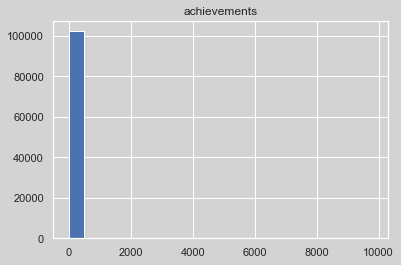

In [10]:
df.hist(column='achievements', figsize=(6,4),bins=20)

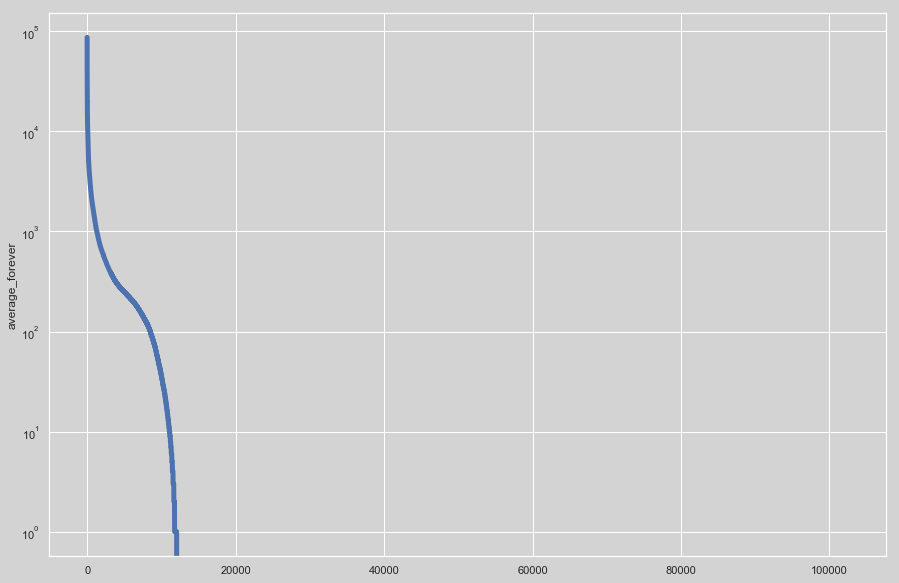

In [11]:
dfRatings = df.sort_values(by='average_forever', ascending=False)
try:
    df.reset_index(inplace = True)
except:
    pass
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgray'}) # sets background colors
fig, ax = plt.subplots(figsize=(15, 10))
timeGraph = sns.lineplot(data=dfRatings, x=df.index, y='average_forever', ci=0.9, ax=ax, linewidth=5)
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.title('bruh', fontsize=20)
# plt.xlabel('bruh', fontsize=20)
# plt.ylabel('bruh', fontsize=20)
gc.collect()
plt.show()

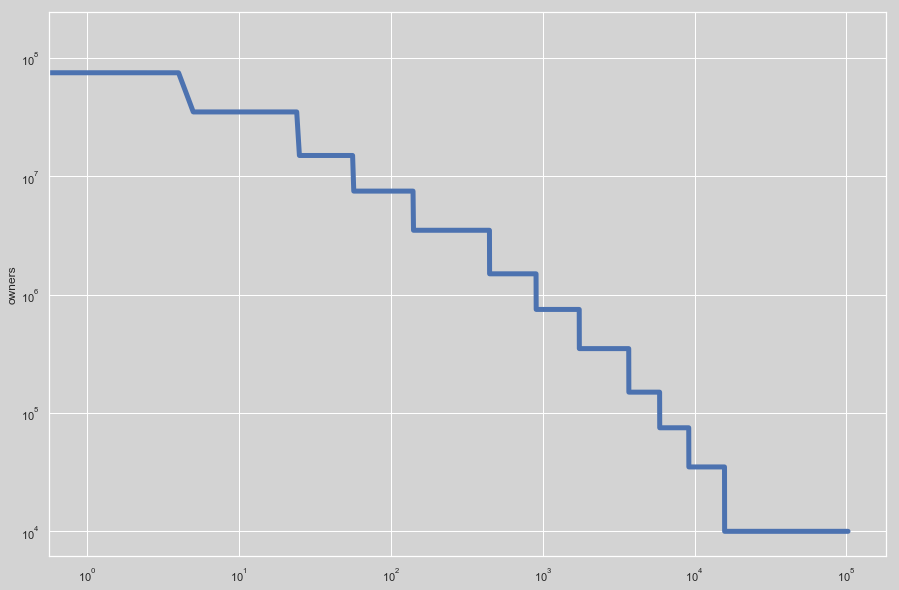

In [16]:
dfRatings = df.sort_values(by='owners', ascending=False)
try:
    df.reset_index(inplace = True)
except:
    pass
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgray'}) # sets background colors
fig, ax = plt.subplots(figsize=(15, 10))
timeGraph = sns.lineplot(data=dfRatings, x=df.index, y='owners', ci=0.9, ax=ax, linewidth=5)
ax.set_yscale('log')
ax.set_xscale('log')
# plt.title('bruh', fontsize=20)
# plt.xlabel('bruh', fontsize=20)
# plt.ylabel('bruh', fontsize=20)
gc.collect()
plt.show()

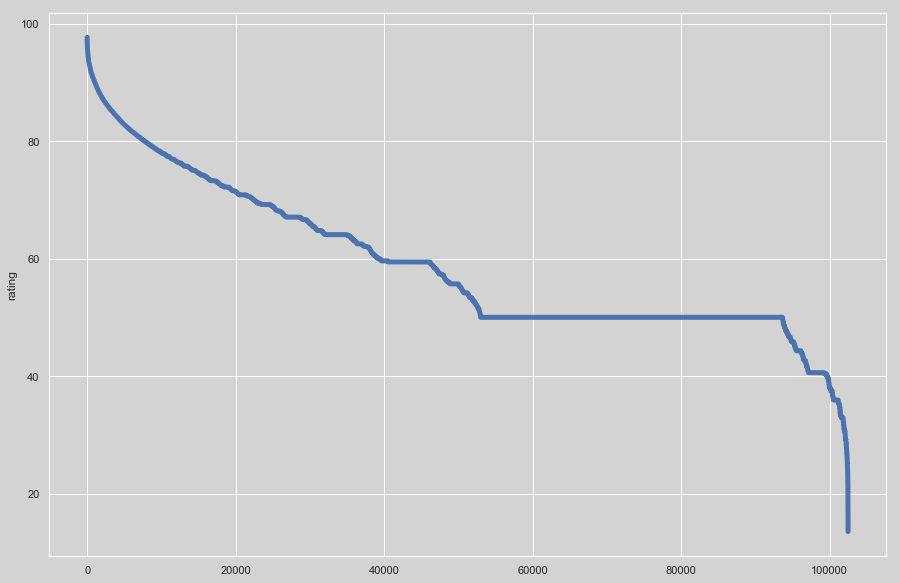

In [17]:
dfRatings = df.sort_values(by='rating', ascending=False)
try:
    df.reset_index(inplace = True)
except:
    pass
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgray'}) # sets background colors
fig, ax = plt.subplots(figsize=(15, 10))
timeGraph = sns.lineplot(data=dfRatings, x=df.index, y='rating', ci=0.9, ax=ax, linewidth=5)
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.title('bruh', fontsize=20)
# plt.xlabel('bruh', fontsize=20)
# plt.ylabel('bruh', fontsize=20)
gc.collect()
plt.show()

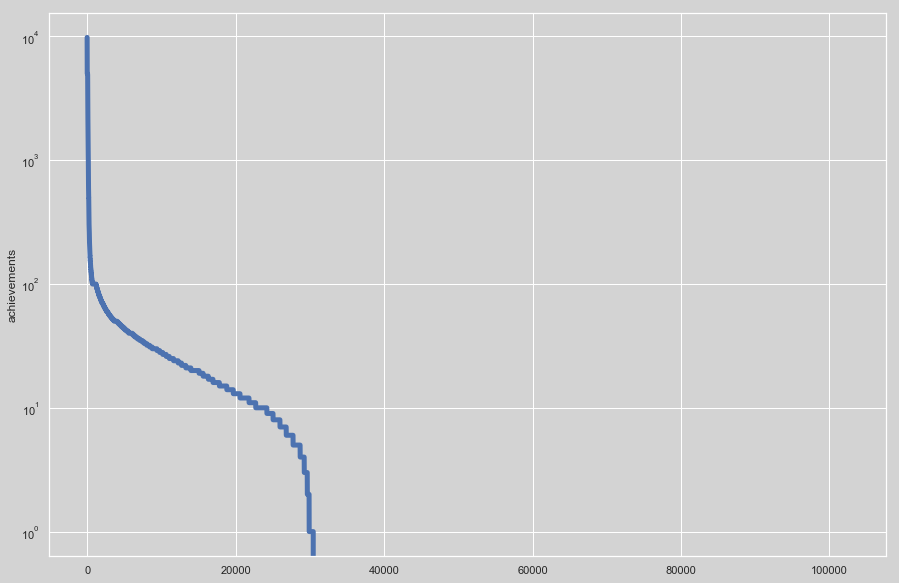

In [18]:
dfRatings = df.sort_values(by='achievements', ascending=False)
try:
    df.reset_index(inplace = True)
except:
    pass
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgray'}) # sets background colors
fig, ax = plt.subplots(figsize=(15, 10))
timeGraph = sns.lineplot(data=dfRatings, x=df.index, y='achievements', ci=0.9, ax=ax, linewidth=5)
ax.set_yscale('log')
# ax.set_xscale('log')
# plt.title('bruh', fontsize=20)
# plt.xlabel('bruh', fontsize=20)
# plt.ylabel('bruh', fontsize=20)
gc.collect()
plt.show()